<a href="https://colab.research.google.com/github/ShitalPandirkar/Book-Recommendation-System/blob/main/heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cardivascular Heart Disease

Git Hub Link :

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['.config', 'drive', 'sample_data']


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
dataset = pd.read_csv("/content/drive/MyDrive/almabetter/Cohort Seattle/heart diseases/heartDisease.csv")


In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
dataset.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
dataset.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0


In [13]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [16]:
dataset["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [17]:
dataset["target"].unique()


array([1, 0])

In [18]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [19]:
print(dataset.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [20]:
dataset['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

<Axes: >

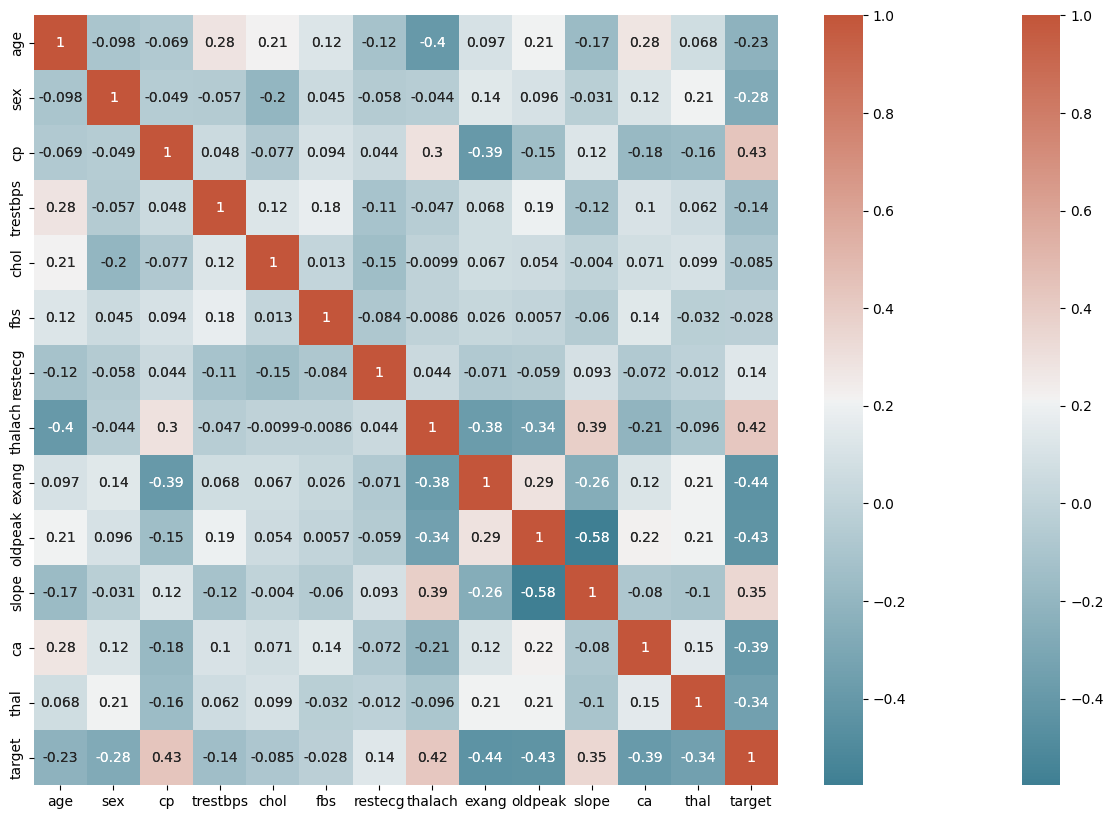

In [21]:
# calculate correlation matrix

corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))


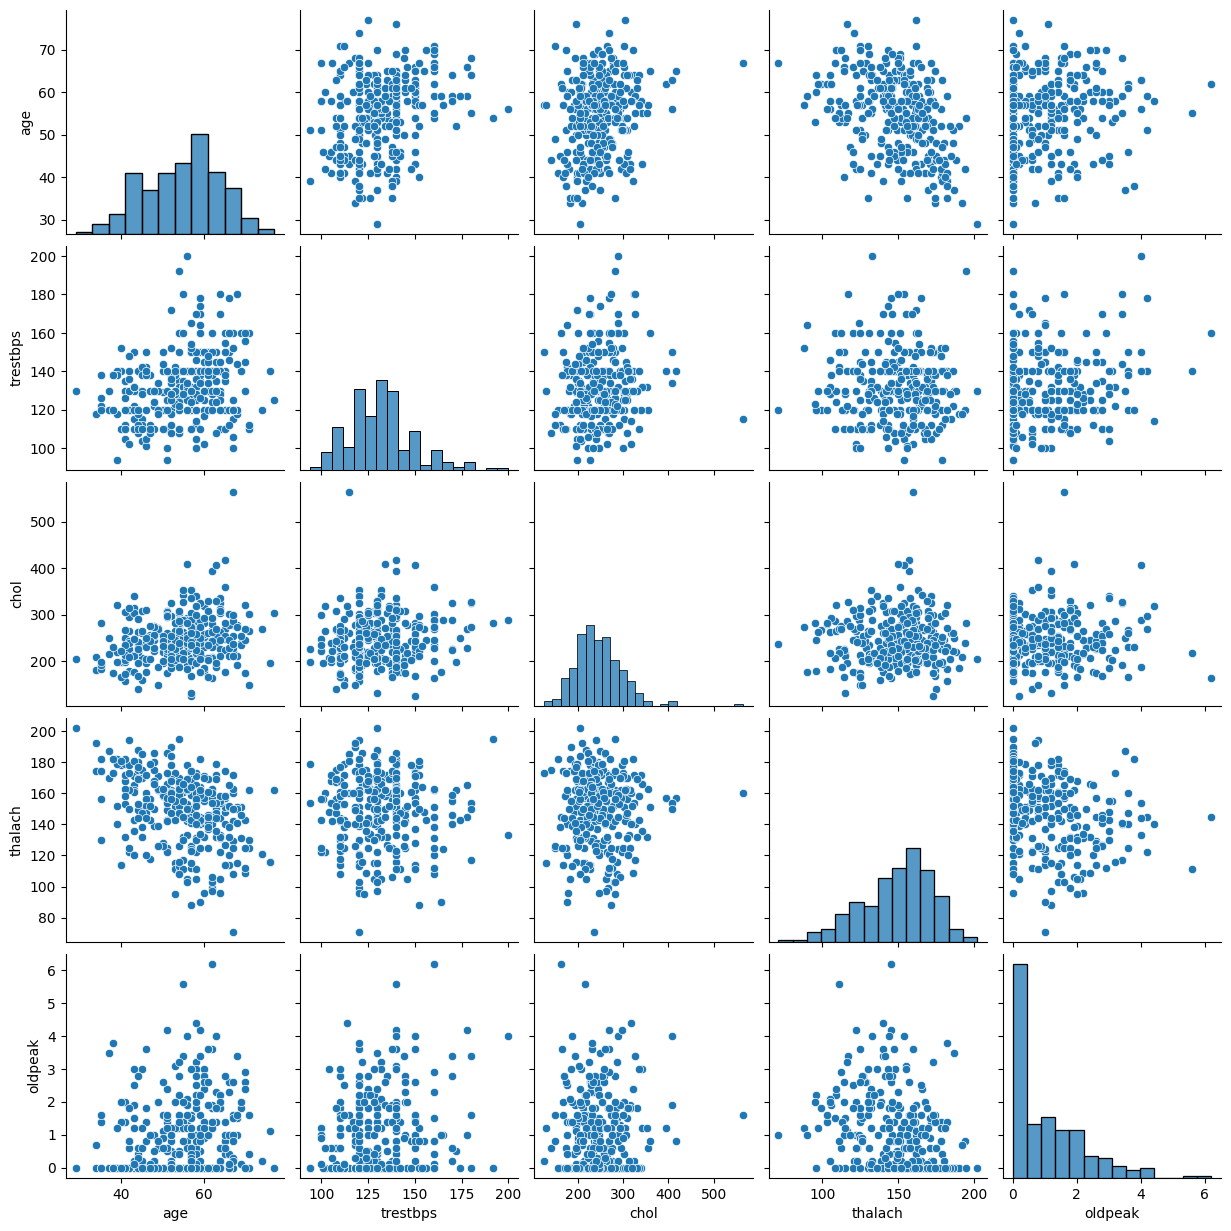

In [22]:
subData = dataset[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)


Text(36.804208333333335, 0.5, 'ST depression')

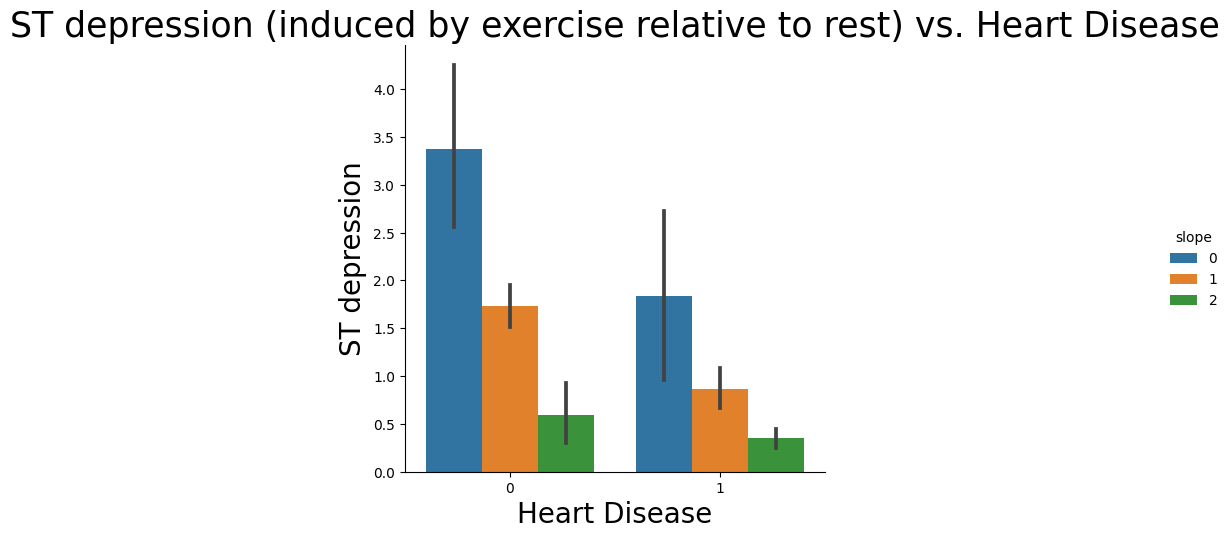

In [23]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=dataset);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)


Text(0, 0.5, 'Thalach Level')

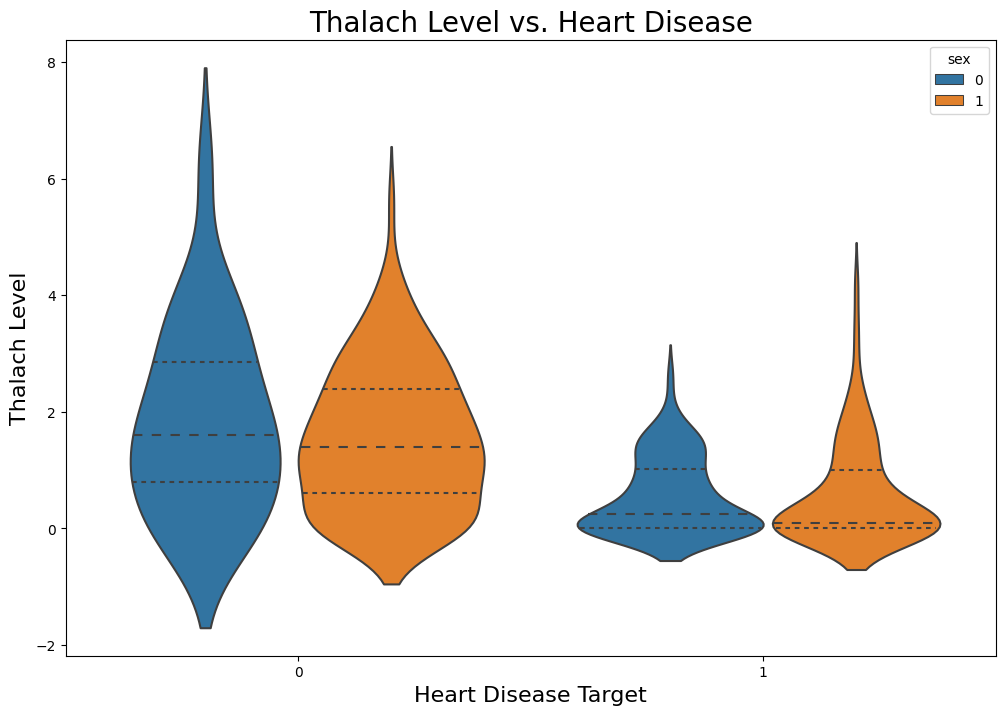

In [24]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= dataset )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)


Text(0, 0.5, 'ST depression induced by exercise relative to rest')

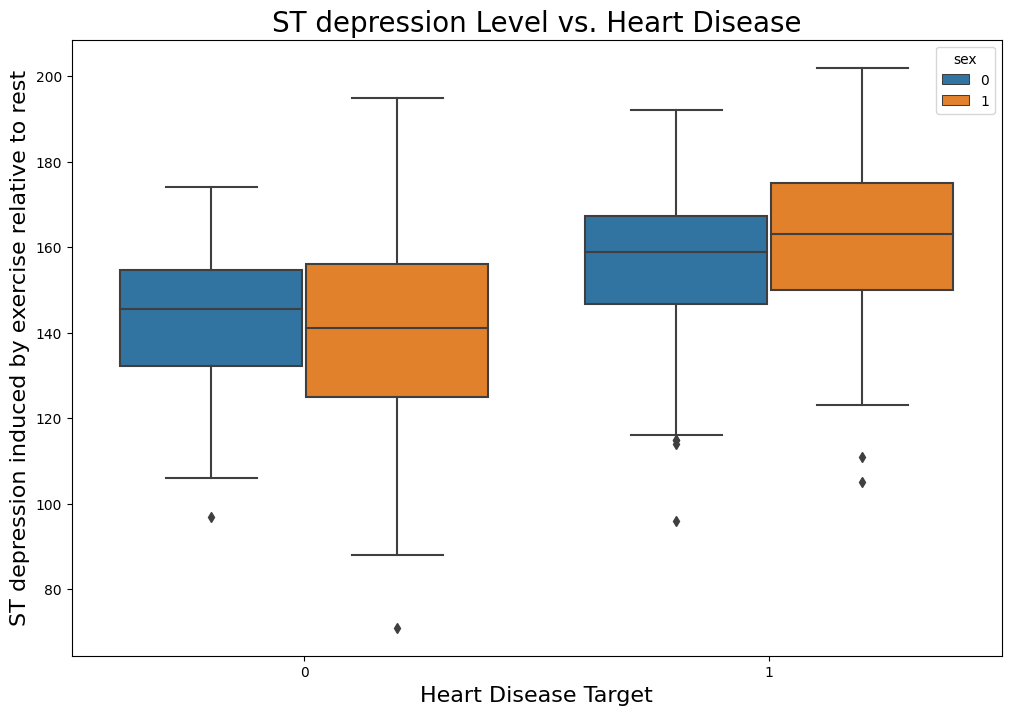

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=dataset )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)


In [26]:
pos_data = dataset[dataset['target']==1]
pos_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [27]:
neg_data = dataset[dataset['target']==0]
neg_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [28]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.583030303030303
(Negative Patients ST depression): 1.5855072463768116


In [29]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


Prepare Data Modeling

In [30]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [34]:
X_train.shape


(242, 13)

In [35]:
X_test.shape


(61, 13)

In [36]:
Y_train.shape


(242,)

In [37]:
Y_test.shape


(61,)

V Model Fitting

In [38]:
from sklearn.metrics import accuracy_score


Logistic Regression


In [39]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



K-NN (K Nearest Neighbours)

In [40]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



SVM (Support Vector Machine)

In [41]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Navies Bayes Classifier

In [42]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Desicion Tree

In [43]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Random Forest

In [44]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



XGBoost

In [45]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

Feature Importance

In [47]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


<Axes: >

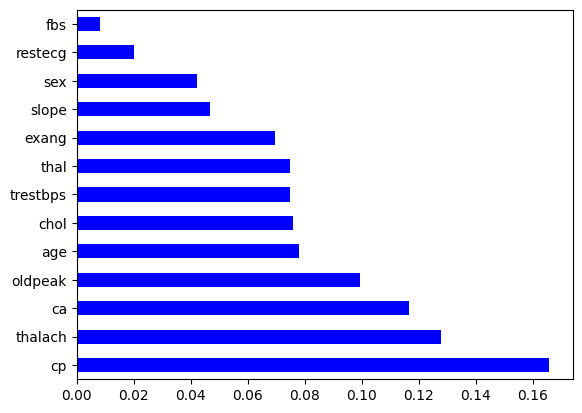

In [48]:
index= dataset.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

Predictions
Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat.

He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can you classify this patient with Heart Disease?

In [49]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


Predicting the Test set results:

First value represents our predicted value, Second value represents our actual value.

If the values match, then we predicted correctly. We can see that our results are very accurate!

In [50]:
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


Conclusions
Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).
